In [45]:
## Implementation of ANN using keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [46]:
### checking the version of tensorflow and keras
print(f"tensorflow version {tf.__version__}")
print(f"keras version{tf.keras.__version__}")

tensorflow version 2.18.0
keras version3.8.0


In [47]:
## gpu/cpu check
tf.config.list_physical_devices("GPU")

[]

In [48]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [49]:
check_list=["GPU","CPU"]

for device in check_list:
    out=tf.config.list_physical_devices(device)
    if len(out)>0:
        print(f"{device} is available")
    else:
        print(f"{device} is not available")

GPU is not available
CPU is available


In [50]:
### we want to create a classifier using keras and tensorflow


## Creating a simpler classifier using keras on MNIST data

In [51]:
mnist=tf.keras.datasets.mnist

In [52]:
mnist

<module 'keras.api.datasets.mnist' from '/usr/local/lib/python3.11/dist-packages/keras/api/datasets/mnist/__init__.py'>

In [53]:
(x_train,y_train),(x_test,y_test) =mnist.load_data()

In [54]:
x_train.shape
## our each image is the matrix of(28*28)
## ek square matrix haing 28*28 elements,each element rainging between 0 to 255

(60000, 28, 28)

In [55]:
x_test.shape

(10000, 28, 28)

In [56]:
 ## mnist data-hand written digits rangling from 0 to 9

In [57]:
## if i want to see the one image
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [58]:
##create the validation datset from the full training data
## scale the data between 0 to 1 ,deviding by 255
x_valid,x_train=x_train[:5000]/255,x_train[5000:]/255
y_valid,y_train=y_train[:5000] ,y_train[5000:]

## scale the test data as well
x_test=x_test/255

In [59]:
len(x_train)

55000

In [60]:
len(x_valid)

5000

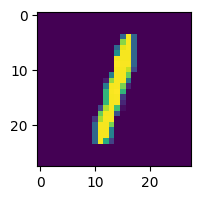

In [61]:
## visually show the first image
plt.figure(figsize=(15,2))
plt.imshow(x_train[23])
plt.show()

<Axes: >

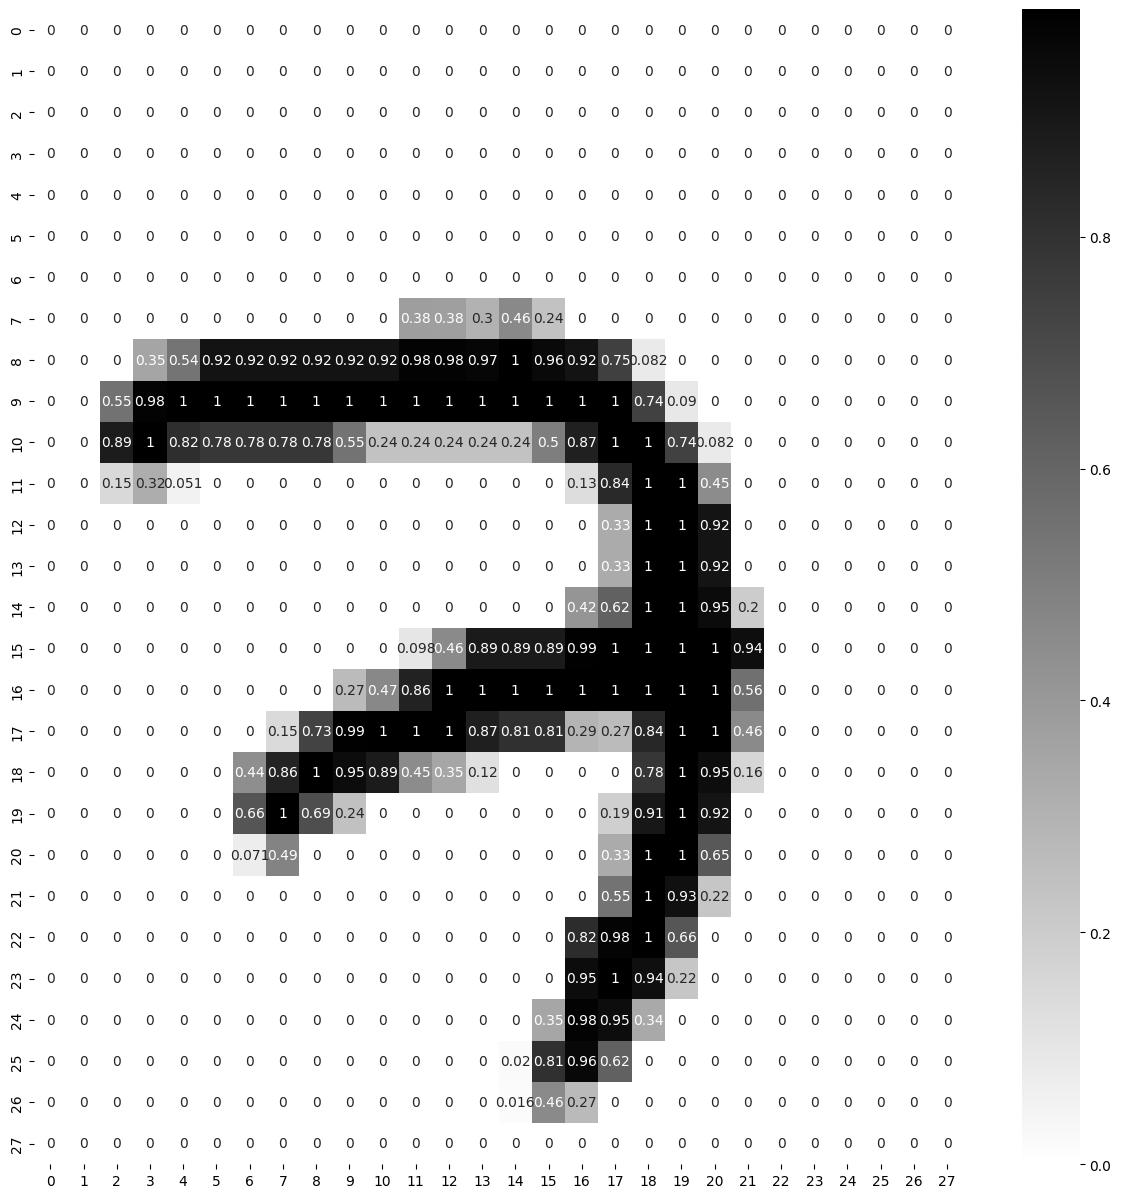

In [62]:
plt.figure(figsize=(15,15))
sns.heatmap(x_train[0],annot=True,cmap="binary")

In [63]:
### here this is the multiclass classification problem ,so we use softmax as activation function

In [64]:
### first we flatten the input layers --
## because our input is in 2d ,first we should flatten it
28*28

784

In [65]:
## creating layers in ANN
LAYERS=[tf.keras.layers.Flatten(input_shape=(28,28),name="inputLayer"),
        tf.keras.layers.Dense(300,activation="relu",name="hiddenLayer1"),
        tf.keras.layers.Dense(100,activation="relu",name="hiddenLayer2"),
        tf.keras.layers.Dense(10,activation="softmax",name="outputLayers")]
model_clf=tf.keras.models.Sequential(LAYERS)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [66]:
model_clf.layers

[<Flatten name=inputLayer, built=True>,
 <Dense name=hiddenLayer1, built=True>,
 <Dense name=hiddenLayer2, built=True>,
 <Dense name=outputLayers, built=True>]

In [67]:
784*300+300
## 784-input param term
## 300-no first hiden layer neuron
## we add biasing term on each of the neuron that is present in the first hiden layer

235500

In [68]:
300*100+100

30100

In [69]:
model_clf.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputLayer (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiddenLayer1 (Dense)            │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiddenLayer2 (Dense)            │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputLayers (Dense)            │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [70]:
## first layer+second layer+bias
784*300+300,300*100+100,100*10+10

(235500, 30100, 1010)

In [71]:
### total parameters to be trained
sum((235500, 30100, 1010))

266610

In [72]:
### difreent diffrent layers

hidden1=model_clf.layers[1]
hidden2=model_clf.layers[2]
print(hidden1.name)
print(hidden2.name)

hiddenLayer1
hiddenLayer2


In [73]:
hidden1.get_weights()

### this is the initialized weights and biases

[array([[-0.0167826 ,  0.06458196,  0.04384948, ...,  0.07342798,
         -0.01867202, -0.02430318],
        [-0.00818425, -0.06517418,  0.01321156, ...,  0.0573965 ,
         -0.07096048, -0.00481026],
        [-0.00364256, -0.01576358, -0.04897322, ...,  0.00968865,
         -0.05257824, -0.02732845],
        ...,
        [ 0.07355011,  0.07346885, -0.07435503, ...,  0.06853028,
         -0.05326236,  0.06513867],
        [ 0.04749942, -0.0210564 , -0.0028506 , ...,  0.05413342,
          0.05047172, -0.00732068],
        [ 0.05076627,  0.02450681,  0.02575645, ..., -0.0587557 ,
         -0.02821747,  0.04265627]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [74]:
weights,biases=hidden1.get_weights()
weights.shape

(784, 300)

In [75]:
biases.shape

(300,)

In [76]:
loss_function="sparse_categorical_crossentropy"
OPTIMIZER="SGD"
metrics=["accuracy"]

model_clf.compile(loss=loss_function,optimizer=OPTIMIZER,metrics=metrics)

In [77]:
## tensornoard callback function

import time

def get_log_path(log_dir="logs/fit"):
    filename=time.strftime("log_%Y_%m_%d_%H_%M_%S")
    logs_path=os.path.join(log_dir,filename)
    print(f"saving logs at {logs_path}")
    return logs_path

log_dir=get_log_path()
tb_cb=tf.keras.callbacks.TensorBoard(log_dir=log_dir)

saving logs at logs/fit/log_2025_04_10_19_07_30


In [78]:
### early stopping callback
CKPT_path="Model_ekpt.h5"
checkpointing_cb=tf.keras.callbacks.ModelCheckpoint(CKPT_path,save_best_only=True)

In [79]:
### training
epochs=30
validation_set=(x_valid,y_valid)

history = model_clf.fit(x_train, y_train, epochs=epochs, validation_data=validation_set, batch_size=32)


Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7385 - loss: 1.0235 - val_accuracy: 0.9126 - val_loss: 0.3093
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9120 - loss: 0.3049 - val_accuracy: 0.9326 - val_loss: 0.2415
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9291 - loss: 0.2488 - val_accuracy: 0.9444 - val_loss: 0.2034
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9405 - loss: 0.2096 - val_accuracy: 0.9508 - val_loss: 0.1795
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9484 - loss: 0.1841 - val_accuracy: 0.9568 - val_loss: 0.1616
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9533 - loss: 0.1628 - val_accuracy: 0.9616 - val_loss: 0.1462
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9590 - loss: 0.1459 - val_accuracy: 0.9636 - val_loss: 0.1350
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9633 - loss: 0.130

In [80]:
df=pd.DataFrame(history.history)

<Axes: >

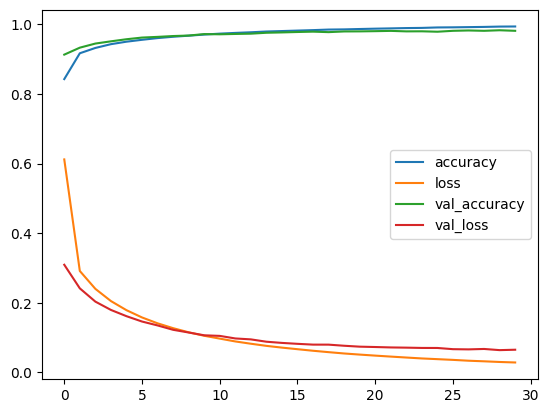

In [81]:
df.plot()

In [82]:
model_clf.evaluate(x_test,y_test)
## it shows 97 percentage of accuracy during the training of the dataset

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9723 - loss: 0.0874


[0.07267781347036362, 0.9775999784469604]

### sample check test data

In [83]:
x_new=x_test[:3]
x_new[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [84]:
actual=y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

<Axes: >

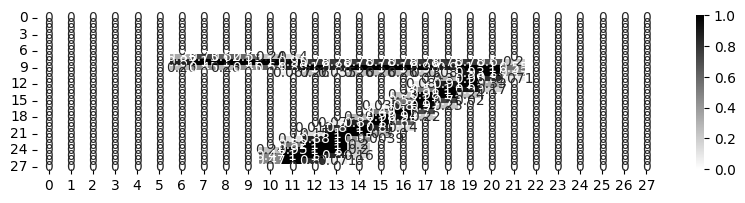

In [85]:
### visualize the image
plt.figure(figsize=(10,2))
sns.heatmap(x_test[0],annot=True,cmap="binary")

<Axes: >

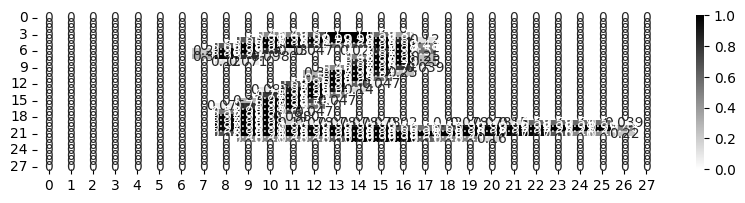

In [86]:
plt.figure(figsize=(10,2))
sns.heatmap(x_test[1],annot=True,cmap="binary")

<Axes: >

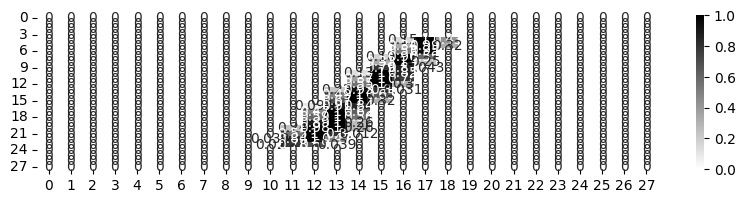

In [87]:
plt.figure(figsize=(10,2))
sns.heatmap(x_test[2],annot=True,cmap="binary")

In [88]:
### there are 3 images ,we have to predict weather the model will predict the right elemenyt or not

In [89]:
y_pred=model_clf.predict(x_new)
y_pred.round(3)

## the first array represents all the elements is 0 except the 7th element
## the second array represents all the elements is 0 except the 2nd elemnt
## the third srray shows the all the elements is 0 except the  first index element)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.999, 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   ,
        0.   ]], dtype=float32)

In [90]:
### the predicted value
y_pred=np.argmax(y_pred,axis=-1)
y_pred  ### the array shows the index position /probability max term

array([7, 2, 1])

In [91]:
actual

array([7, 2, 1], dtype=uint8)

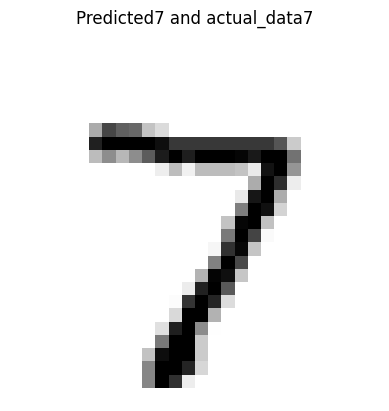

###############


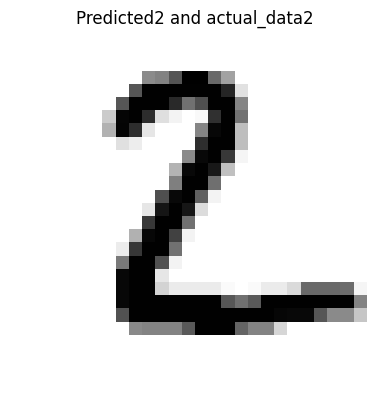

###############


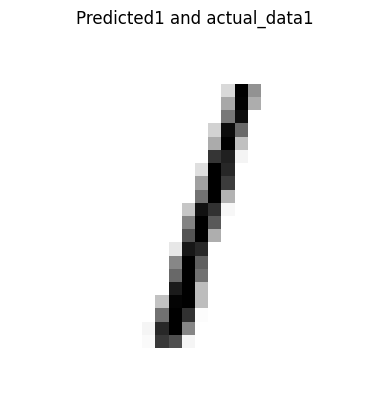

###############


In [92]:
for data,pred,actual_data in zip(x_new,y_pred,actual):
    plt.imshow(data,cmap="binary")
    plt.title(f"Predicted{pred} and actual_data{actual_data}")
    plt.axis("off")
    plt.show()
    print("###############")

In [93]:
from keras.models import Sequential
from keras.layers import Dense,Flatten

## define the model
model=Sequential()
model.add(Dense(units=64,activation="relu",input_dim=100))
model.add(Dense(units=10,activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
